# Part I - Poly-alphabetic Ciphers

## Task 1 - Crypto Analysis

In [131]:
import matplotlib.pyplot as plt
import numpy as np
import pprint

Define Variables

In [132]:
ENCRYPTED_TEXT = \
    """ FRRPU TIIYE AMIRN QLQVR BOKGK NSNQQ IUTTY
        IIYEA WIJTG LVILA ZWZKT ZCJQH IFNYI WQZXH
        RWZQW OHUTI KWNNQ YDLKA EOTUV XELMT SOSIX
        JSKPR BUXTI TBUXV BLNSX FJKNC HBLUK PDGUI
        IYEAM OJCXW FMJVM MAXYT XFLOL RRLAA JZAXT
        YYWFY NBIVH VYQIO SLPXH ZGYLH WGFSX LPSND
        UKVTR XPKSS VKOWM QKVCR TUUPR WQMWY XTYLQ
        XYYTR TJJGO OLMXV CPPSL KBSEI PMEGC RWZRI
        YDBGE BTMFP ZXVMF MGPVO OKZXX IGGFE SIBRX
        SEWTY OOOKS PKYFC ZIEYF DAXKG ARBIW KFWUA
        SLGLF NMIVH VVPTY IJNSX FJKNC HBLUK PDGUI
        IYEAM HVFDY CULJS EHHMX LRXBN OLVMR """

ENCRYPTED_TEXT_WITHOUT_SPACES = ENCRYPTED_TEXT.replace(" ", "").replace("\n", "")
ENCRYPTED_TEXT_LEN = len(ENCRYPTED_TEXT_WITHOUT_SPACES)

In [133]:
ENCRYPTED_TEXT_WITHOUT_SPACES

'FRRPUTIIYEAMIRNQLQVRBOKGKNSNQQIUTTYIIYEAWIJTGLVILAZWZKTZCJQHIFNYIWQZXHRWZQWOHUTIKWNNQYDLKAEOTUVXELMTSOSIXJSKPRBUXTITBUXVBLNSXFJKNCHBLUKPDGUIIYEAMOJCXWFMJVMMAXYTXFLOLRRLAAJZAXTYYWFYNBIVHVYQIOSLPXHZGYLHWGFSXLPSNDUKVTRXPKSSVKOWMQKVCRTUUPRWQMWYXTYLQXYYTRTJJGOOLMXVCPPSLKBSEIPMEGCRWZRIYDBGEBTMFPZXVMFMGPVOOKZXXIGGFESIBRXSEWTYOOOKSPKYFCZIEYFDAXKGARBIWKFWUASLGLFNMIVHVVPTYIJNSXFJKNCHBLUKPDGUIIYEAMHVFDYCULJSEHHMXLRXBNOLVMR'

Given that we are working with Polyalphabetic Ciphers, we will perform a frequency analysis on the ciphertext.
This will help us with a couple of things:
1. We can determine the length of the key
2. To determine the strength of the polyalphabetic cipher which was used to encrypt the message

In [134]:
def frequency_analysis(message):
    frequencies = {}
    for c in message:
        if c in frequencies:
            frequencies[c] += 1
        else:
            frequencies[c] = 1
    return frequencies, sorted(frequencies.items(), key=lambda x: x[0])

In [135]:
def PlotLetterFrequencies(english_letter_frequencies, cipher_letter_frequencies, sorted_english_letter_frequencies, sorted_cipher_letter_frequencies):
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))

    # plotting english letter frequencies
    axs[0, 0].bar(*zip(*english_letter_frequencies.items()))
    axs[0, 0].bar(*zip(*english_letter_frequencies.items()))
    axs[0, 0].set_title("English Letter Frequencies")

    # plot cipher letter frequencies, sorted by value
    value_sorted_cipher_letter_frequencies = sorted(cipher_letter_frequencies.items(), key=lambda x: x[1], reverse=True)
    axs[0, 1].bar(*zip(*value_sorted_cipher_letter_frequencies))
    axs[0, 1].set_title("Cipher Letter Frequencies")
    # plot sorted english letter frequencies
    axs[1, 0].bar(*zip(*sorted_english_letter_frequencies))
    axs[1, 0].set_title("Sorted (Alphabetic) English Letter Frequencies")
    # plot sorted cipher letter frequencies
    axs[1, 1].bar(*zip(*sorted_cipher_letter_frequencies))
    axs[1, 1].set_title("Sorted (Alphabetic) Cipher Letter Frequencies")
    # show the plot
    plt.show()

In [136]:
# https://norvig.com/mayzner.html
ENGLISH_LETTER_FREQUENCIES = { "E" : 12.49, "T" :  9.28, "A" :  8.04, "O" :  7.64, "I" :  7.57, "N" :  7.23, "S" :  6.51, "R" :  6.28, "H" :  5.05, "L" :  4.07, "D" :  3.82, "C" :  3.34, "U" :  2.73,
                               "M" :  2.51, "F" :  2.40, "P" :  2.14, "G" :  1.87, "W" :  1.68, "Y" :  1.66, "B" :  1.48, "V" :  1.05, "K" :  0.54, "X" :  0.23, "J" :  0.16, "Q" :  0.12, "Z" :  0.09}
sorted_ENGLISH_LETTER_FREQUENCIES = sorted(ENGLISH_LETTER_FREQUENCIES.items(), key=lambda x: x[0])

In [137]:
CIPHER_LETTER_FREQUENCIES, sorted_CIPHER_LETTER_FREQUENCIES = frequency_analysis(ENCRYPTED_TEXT_WITHOUT_SPACES)
print(sorted_CIPHER_LETTER_FREQUENCIES)

[('A', 13), ('B', 13), ('C', 9), ('D', 7), ('E', 13), ('F', 16), ('G', 14), ('H', 12), ('I', 27), ('J', 12), ('K', 20), ('L', 22), ('M', 17), ('N', 14), ('O', 16), ('P', 15), ('Q', 12), ('R', 18), ('S', 18), ('T', 20), ('U', 15), ('V', 18), ('W', 16), ('X', 24), ('Y', 23), ('Z', 11)]


In [138]:
def NormalizeFrequencies(frequencies):
    total = sum(frequencies.values())
    return { k : v / total for k, v in frequencies.items() }

ENGLISH_LETTER_FREQUENCIES = NormalizeFrequencies(ENGLISH_LETTER_FREQUENCIES)
CIPHER_LETTER_FREQUENCIES = NormalizeFrequencies(CIPHER_LETTER_FREQUENCIES)

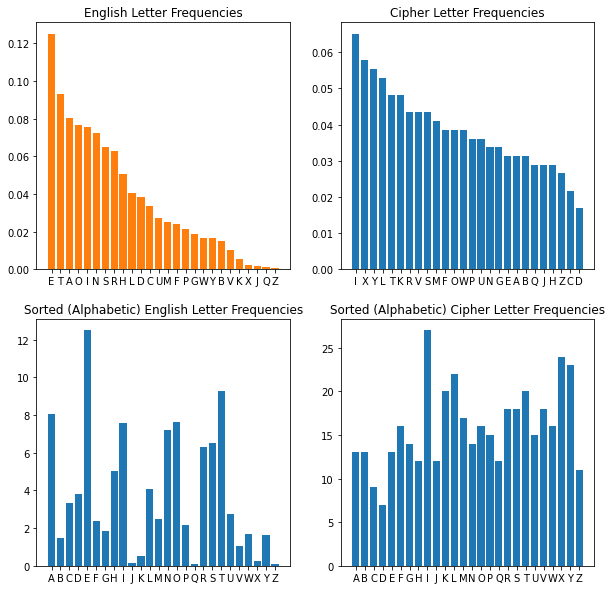

In [139]:
PlotLetterFrequencies(ENGLISH_LETTER_FREQUENCIES, CIPHER_LETTER_FREQUENCIES, sorted_ENGLISH_LETTER_FREQUENCIES, sorted_CIPHER_LETTER_FREQUENCIES)

<img src="./images/PolyAlphabeticCipherDistribution.jpg">

Looking at the the distribution of the characters in the cipher text, we see that the distrubtion is much more uniform than the distribution of the characters in the english language.
An assumtion can be made that the cipher used, considering the polyalphabetic ciphers that have been presented in the lecture, and the typical nature of the Cipher distributions in the bottom image, that the ciphers used might be Vigeneres cipher.
**Ref: CRYPTOGRAPHY AND NETWORK SECURITY PRINCIPLES AND PRACTICE 7TH EDITION**

---

In [142]:
def SplitCipherIntoBins(cipher, number_of_bins):
    bins = []
    for i in range(0, number_of_bins):
        bins.append([])
    for i in range(0, len(cipher)):
        bins[i % number_of_bins].append(cipher[i]) # append to bin based on position x % number_of_bins
    return bins

def FrequencyAnalysisOnBins(bins):
    frequencies = []
    for i in range(0, len(bins)):
        frequencies.append(frequency_analysis(bins[i]))
    return frequencies

def PlotLetterFrequenciesOnBin(frequencies, bin_number):
    plt.bar(*zip(*sorted(frequencies[bin_number][0].items(), key=lambda x: x[0])))
    plt.title("Letter Frequencies on Bin " + str(bin_number))

def CollectBinsForAllPossibleBinSizes(cipher, min=1, max=20):
    bins = []
    for i in range(min, max):
        bins.append(SplitCipherIntoBins(cipher, i))
    return bins

In [143]:
bin_collection = CollectBinsForAllPossibleBinSizes(ENCRYPTED_TEXT_WITHOUT_SPACES, 3, 10)

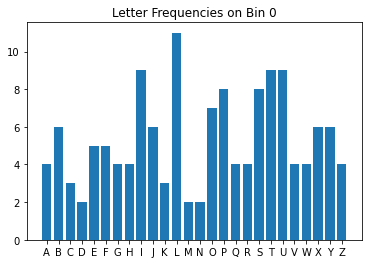

In [144]:
tri_bin_frequencies = FrequencyAnalysisOnBins(bin_collection[0])
PlotLetterFrequenciesOnBin(tri_bin_frequencies, 0)

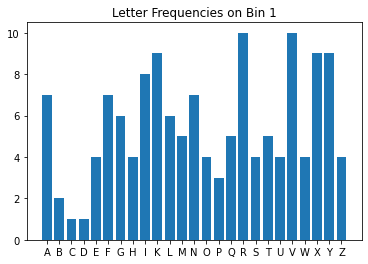

In [145]:
PlotLetterFrequenciesOnBin(tri_bin_frequencies, 1)

Length 4 - Key

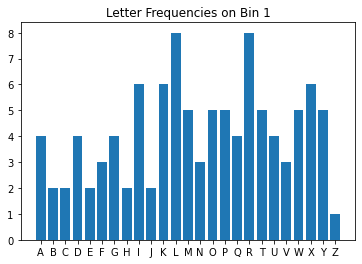

In [170]:
four_bin_frequencies = FrequencyAnalysisOnBins(bin_collection[1])
PlotLetterFrequenciesOnBin(four_bin_frequencies, 1)

Length 6 - Key

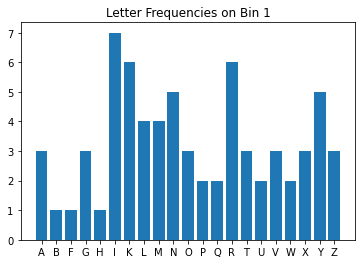

In [171]:
six_bin_frequencies = FrequencyAnalysisOnBins(bin_collection[3])
PlotLetterFrequenciesOnBin(six_bin_frequencies, 1)

Looking at these bins it looks like there was no repeating key used in the process of encrypting the message.
This suggests that the use of a autokey cipher may have been used.

## Task 1 - Decryption

Function for encryption and decryption using Autokey Cipher

In [149]:
import string
ALPHA = string.ascii_uppercase
def autokey_cipher(message, key, mode='encrypt'):

    msg = ""
    autokey = ""
    if mode == 'encrypt':
        autokey = (key + message)[:len(message)]
        for i in range(len(message)):
            msg += ALPHA[(ALPHA.find(message[i]) + ALPHA.find(autokey[i])) % len(ALPHA)]
    elif mode == 'decrypt':
        autokey = key
        for i in range(len(message)):
            charIndex = (ALPHA.find(message[i]) - ALPHA.find(autokey[i])) % len(ALPHA)
            charIndex = charIndex if charIndex >= 0 else charIndex + len(ALPHA)
            msg += ALPHA[charIndex]
            autokey += ALPHA[charIndex]
    return msg

In [150]:
test_msg, test_key = "THISISATESTMESSAGE", "KEY"
test_enc_autokey = autokey_cipher(test_msg, test_key)
test_dec_autokey = autokey_cipher(test_enc_autokey, test_key, 'decrypt')
print(test_enc_autokey)
print(test_dec_autokey)

DLGLPASBWSMQWLEEYW
THISISATESTMESSAGE


Using the key we found from the online decoder, we can now decrypt the message. Ref: https://www.dcode.fr/autoclave-cipher

In [151]:
autokey_cipher(ENCRYPTED_TEXT_WITHOUT_SPACES, "DATABF", "decrypt")

'CRYPTOGRAPHYCANBESTRONGORWEAKCRYPTOGRAPHICSTRENGTHISMEASUREDINTHETIMEANDRESOURCESITWOULDREQUIRETORECOVERTHEPLAINTEXTTHERESULTOFSTRONGCRYPTOGRAPHYISCIPHERTEXTTHATISVERYDIFFICULTTODECIPHERWITHOUTPOSSESSIONOFTHEAPPROPRIATEDECODINGTOOLHOWDIFFICULTGIVENALLOFTODAYSCOMPUTINGPOWERANDAVAILABLETIMEEVENABILLIONCOMPUTERSDOINGABILLIONCHECKSASECONDITISNOTPOSSIBLETODECIPHERTHERESULTOFSTRONGCRYPTOGRAPHYBEFORETHEENDOFTHEUNIVERSE'

## Task 3

In [172]:
ENCRYPTED_TEXT_ADDITIONAL = """
                        IRKPV YNZPT UFQZL ULCDI OEVWF ETBAW SHLGO
                        YQSXT UQRRK LRQUT FHUSE ZBFPR BEPHY DYEKF
                        ZSPPT VYQSY GKUHJ GNHXN UMWFF XIZFN NLWTJ
                        CKYHZ YDPDX KCOUO JEOMU AKVAU EGUEX RKHFC
                        SNHGG WRABW RASXJ IFJHO JRLLJ KOQLO UQRIT
                        YHVFV GZGRM TLRQJ ZGNNP NYJAE DFLQI SLYSV
                        RVKLE AJUNL MHDGE IFFQN FKEKT NJGQN OPOXM
                        VVRRC JGHEH FEVGB QDAEI FDHTA AWFYG ZLLVO
                        AUXFV JRPGV DYOYK BFMQA TWFMS WUQEB PQHXC
                        WWEUP LGSGL NYMTM RXOWK FZFOE FUBFG QFNVI
                        OVLHZ NETBS AIBBT PEIHQ DRTAU EGUEX RKHFC
                        SNHGG PDDHY OBGOV CJBXG DVEIZ LWMJS
"""
ENCRYPTED_TEXT_ADDITIONAL_WITHOUT_SPACES = ENCRYPTED_TEXT_ADDITIONAL.replace(" ", "").replace("\n", "")
ENCRYPTED_TEXT_ADDITIONAL_WITHOUT_SPACES

'IRKPVYNZPTUFQZLULCDIOEVWFETBAWSHLGOYQSXTUQRRKLRQUTFHUSEZBFPRBEPHYDYEKFZSPPTVYQSYGKUHJGNHXNUMWFFXIZFNNLWTJCKYHZYDPDXKCOUOJEOMUAKVAUEGUEXRKHFCSNHGGWRABWRASXJIFJHOJRLLJKOQLOUQRITYHVFVGZGRMTLRQJZGNNPNYJAEDFLQISLYSVRVKLEAJUNLMHDGEIFFQNFKEKTNJGQNOPOXMVVRRCJGHEHFEVGBQDAEIFDHTAAWFYGZLLVOAUXFVJRPGVDYOYKBFMQATWFMSWUQEBPQHXCWWEUPLGSGLNYMTMRXOWKFZFOEFUBFGQFNVIOVLHZNETBSAIBBTPEIHQDRTAUEGUEXRKHFCSNHGGPDDHYOBGOVCJBXGDVEIZLWMJS'

We need to decrypt the message twice to get the plaintext message.

In [173]:
Decrypt_first_time = autokey_cipher(ENCRYPTED_TEXT_ADDITIONAL_WITHOUT_SPACES, "DATABF", "decrypt")
plaintext = autokey_cipher(Decrypt_first_time, "DATABF", "decrypt")
print(plaintext)

CRYPTOGRAPHYCANBESTRONGORWEAKCRYPTOGRAPHICSTRENGTHISMEASUREDINTHETIMEANDRESOURCESITWOULDREQUIRETORECOVERTHEPLAINTEXTTHERESULTOFSTRONGCRYPTOGRAPHYISCIPHERTEXTTHATISVERYDIFFICULTTODECIPHERWITHOUTPOSSESSIONOFTHEAPPROPRIATEDECODINGTOOLHOWDIFFICULTGIVENALLOFTODAYSCOMPUTINGPOWERANDAVAILABLETIMEEVENABILLIONCOMPUTERSDOINGABILLIONCHECKSASECONDITISNOTPOSSIBLETODECIPHERTHERESULTOFSTRONGCRYPTOGRAPHYBEFORETHEENDOFTHEUNIVERSE
